In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as date
import math
import os

In [2]:
plot2 = pd.read_csv('../data/pearse_street/data-plot-21.csv')
plot3 = pd.read_csv('../data/pearse_street/data-plot-22.csv')
plot4 = pd.read_csv('../data/pearse_street/data-plot-23.csv')

In [3]:
plot2.head()

,Date and Time,NO<sub>2</sub>,O<sub>3</sub>,PM<sub>10</sub>,PM<sub>2.5</sub>
0,2022-01-01 00:00:00,14.53,41.67,NaN,NaN
1,2022-01-01 01:00:00,10.20,44.99,NaN,NaN
2,2022-01-01 02:00:00,7.72,49.98,NaN,NaN
3,2022-01-01 03:00:00,6.73,52.82,NaN,NaN
4,2022-01-01 04:00:00,2.87,57.84,NaN,NaN


In [4]:
plot3.head()

,Date and Time,NO<sub>2</sub>,O<sub>3</sub>,PM<sub>10</sub>,PM<sub>2.5</sub>
0,2022-07-01 01:00:00,21.00,24.46,7.10,3.39
1,2022-07-01 02:00:00,10.54,33.62,4.62,1.95
2,2022-07-01 03:00:00,10.73,30.87,4.20,2.05
3,2022-07-01 04:00:00,10.17,28.82,4.18,2.09
4,2022-07-01 05:00:00,15.18,24.48,4.92,2.34


In [5]:
plot4.head()

,Date and Time,NO<sub>2</sub>,O<sub>3</sub>,PM<sub>10</sub>,PM<sub>2.5</sub>
0,2022-12-01 00:00:00,66.61,-1.81,46.92,20.95
1,2022-12-01 01:00:00,60.84,-1.42,42.10,26.36
2,2022-12-01 02:00:00,54.61,-1.75,30.74,22.97
3,2022-12-01 03:00:00,54.87,-1.09,18.82,13.91
4,2022-12-01 04:00:00,49.75,-2.01,17.44,12.04


In [6]:
aqi_2022 = pd.concat([plot2,plot3,plot4], axis=0).reset_index()

In [7]:
aqi_2022 = aqi_2022.rename(columns={'Date and Time': 'datetime','NO<sub>2</sub>': 'no2','O<sub>3</sub>': 'o3' , 'PM<sub>10</sub>': 'pm10', 'PM<sub>2.5</sub>': 'pm2.5'})

In [8]:
aqi_2022.dtypes

index         int64
datetime     object
no2         float64
o3          float64
pm10        float64
pm2.5       float64
dtype: object

In [9]:
aqi_2022['datetime'] = pd.to_datetime(aqi_2022['datetime'])

In [10]:
aqi_2022.head()

,index,datetime,no2,o3,pm10,pm2.5
0,0,2022-01-01 00:00:00,14.53,41.67,NaN,NaN
1,1,2022-01-01 01:00:00,10.20,44.99,NaN,NaN
2,2,2022-01-01 02:00:00,7.72,49.98,NaN,NaN
3,3,2022-01-01 03:00:00,6.73,52.82,NaN,NaN
4,4,2022-01-01 04:00:00,2.87,57.84,NaN,NaN


# Handling missing values

### Visualising outliers

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/258928235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')


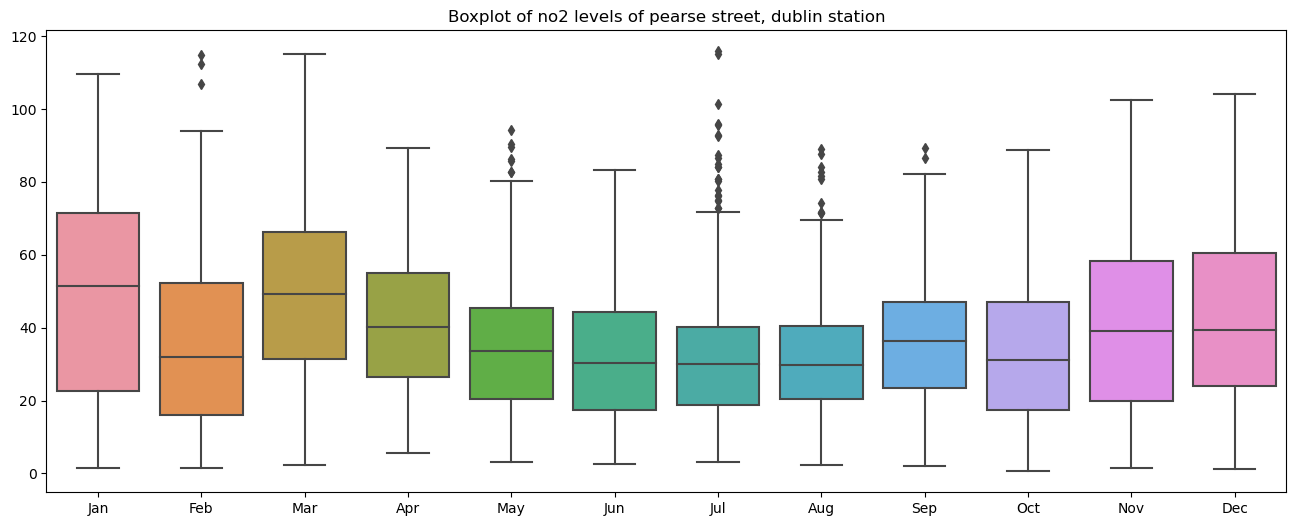

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/258928235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')


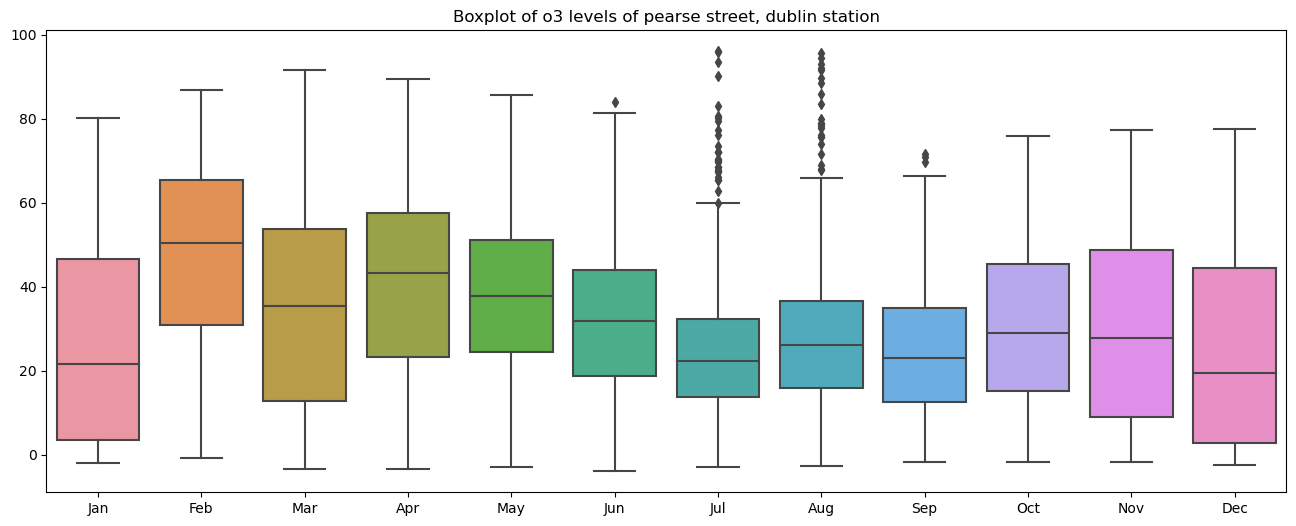

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/258928235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')


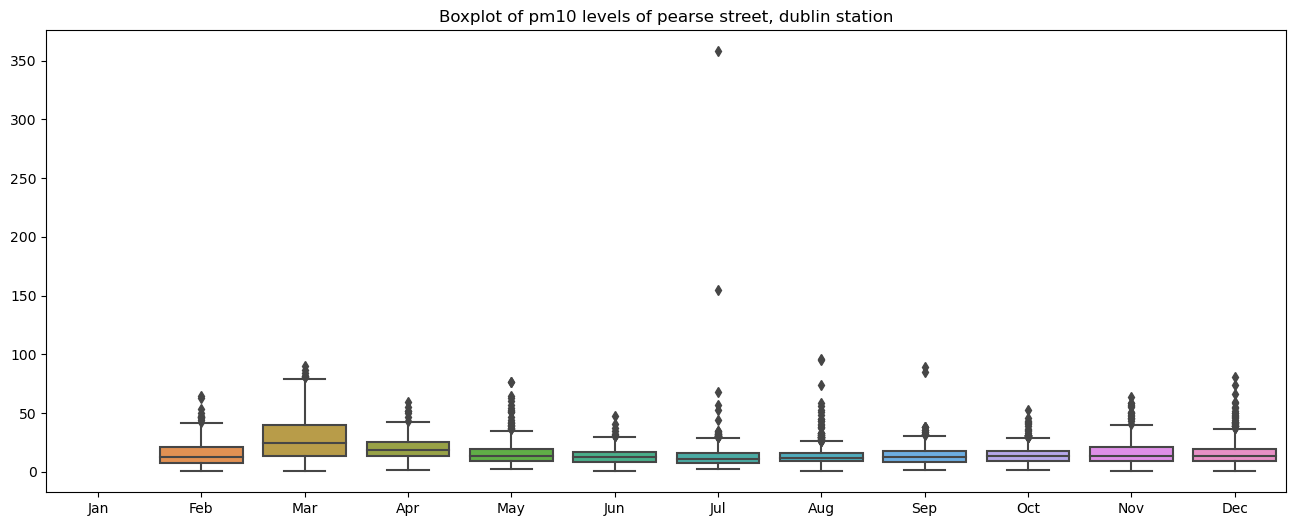

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/258928235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')


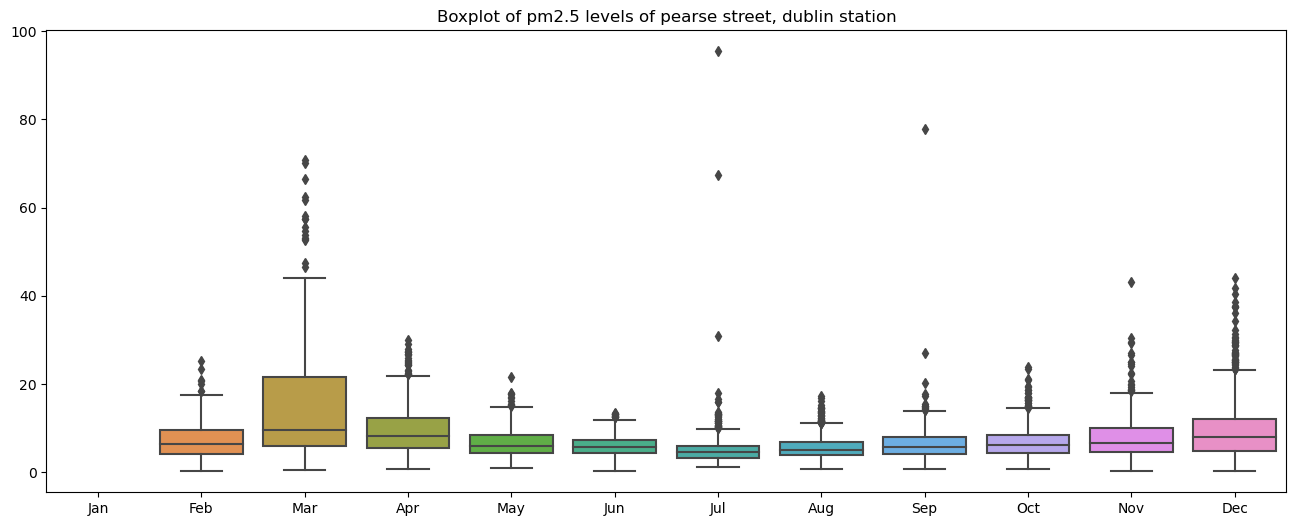

In [28]:
def plotbox(dataset, col, fromtime, to):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=timeframe, x='month', y=col)
    plt.title("Boxplot of " + col +" levels of pearse street, dublin station")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

plotbox(aqi_2022, 'no2','2022-01-01', '2022-12-31')
plotbox(aqi_2022, 'o3','2022-01-01', '2022-12-31')
plotbox(aqi_2022, 'pm10','2022-01-01', '2022-12-31')   
plotbox(aqi_2022, 'pm2.5','2022-01-01', '2022-12-31')     

In [12]:
aqi_copy = aqi_2022.copy()

In [13]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col].loc[~((df[col] >= lower_bound) & (df[col] <= upper_bound))] = np.nan
    
    #df_altered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

aqi_copy = removeOutliers(aqi_copy, 'no2')
aqi_copy = removeOutliers(aqi_copy, 'o3')
aqi_copy = removeOutliers(aqi_copy, 'pm10')
aqi_copy = removeOutliers(aqi_copy, 'pm2.5')

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/2014402565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[~((df[col] >= lower_bound) & (df[col] <= upper_bound))] = np.nan


/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/458577300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')


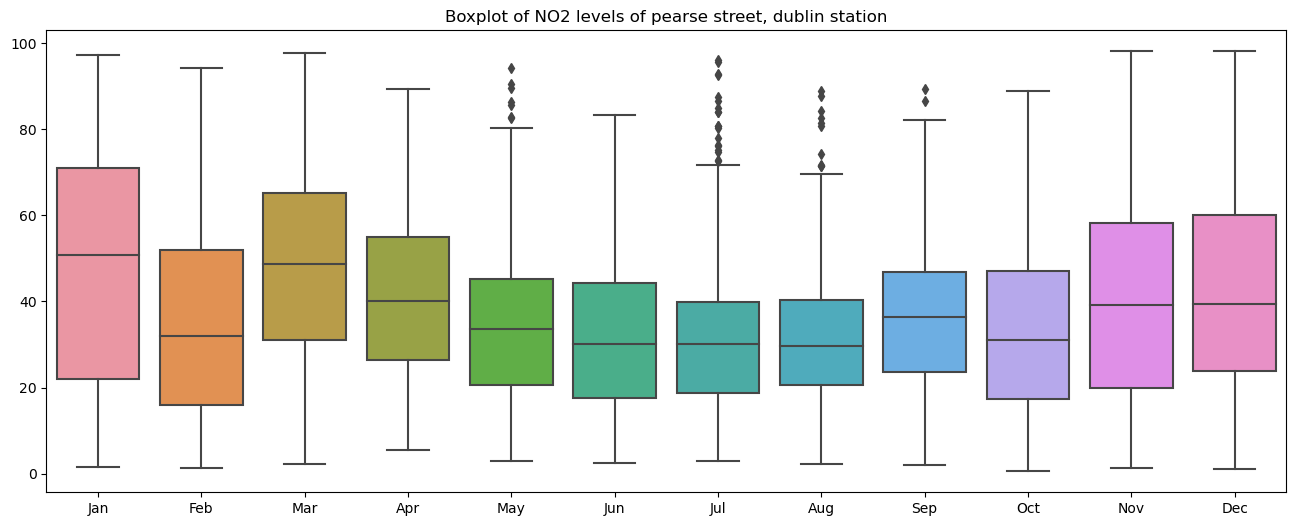

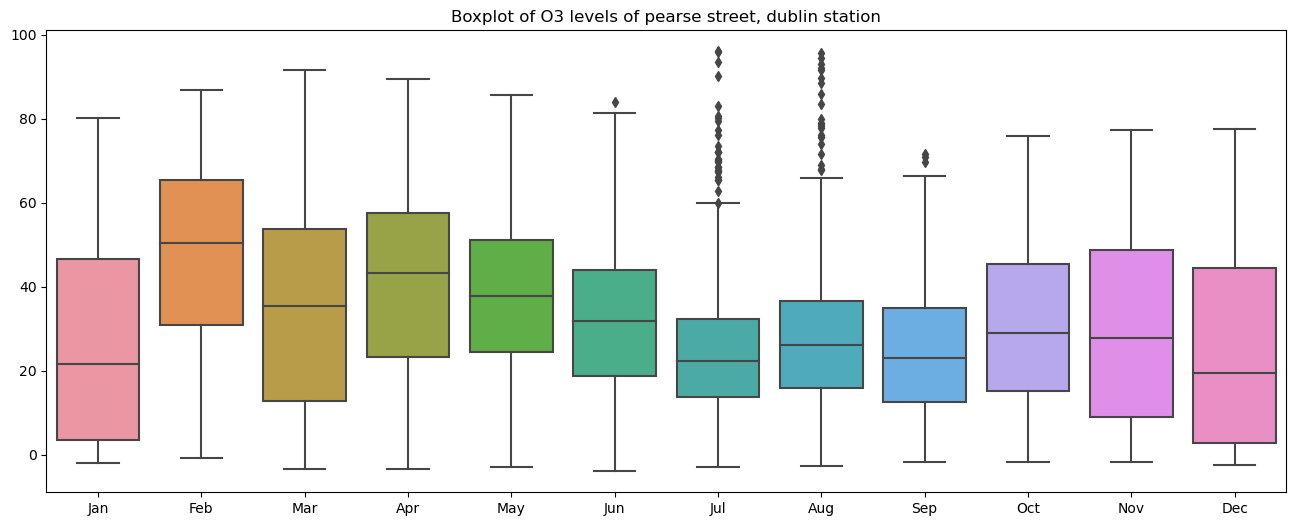

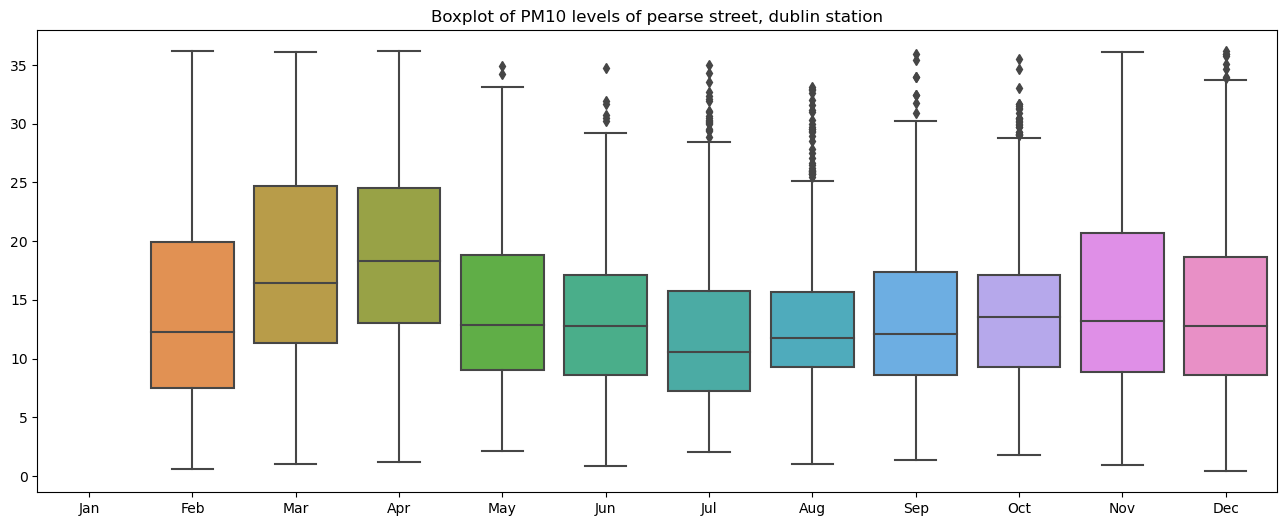

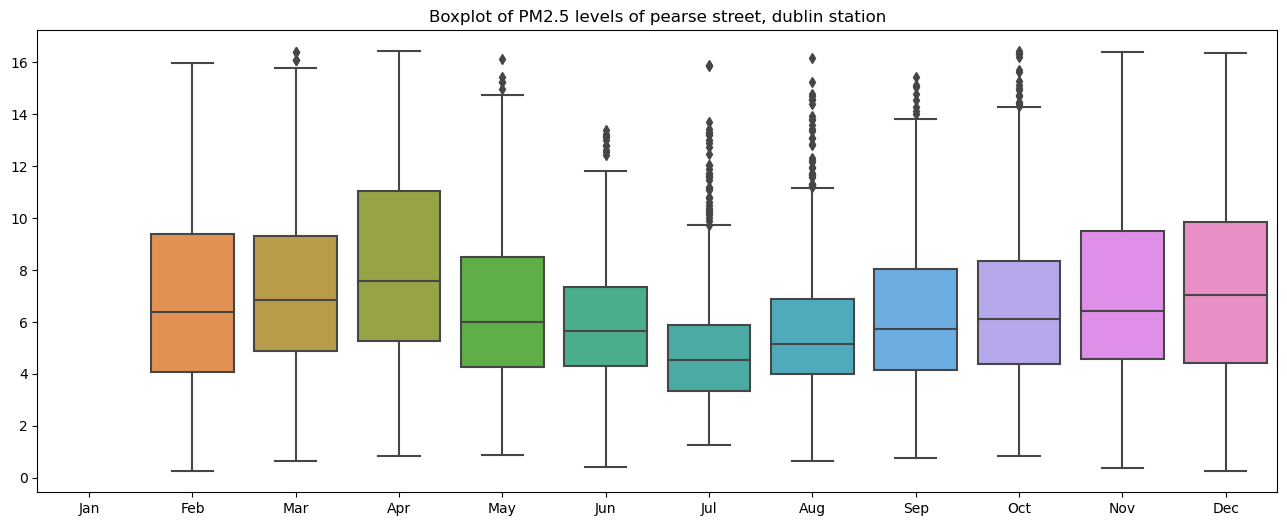

In [14]:
plotbox(aqi_copy,'2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')

### Visualising distribution

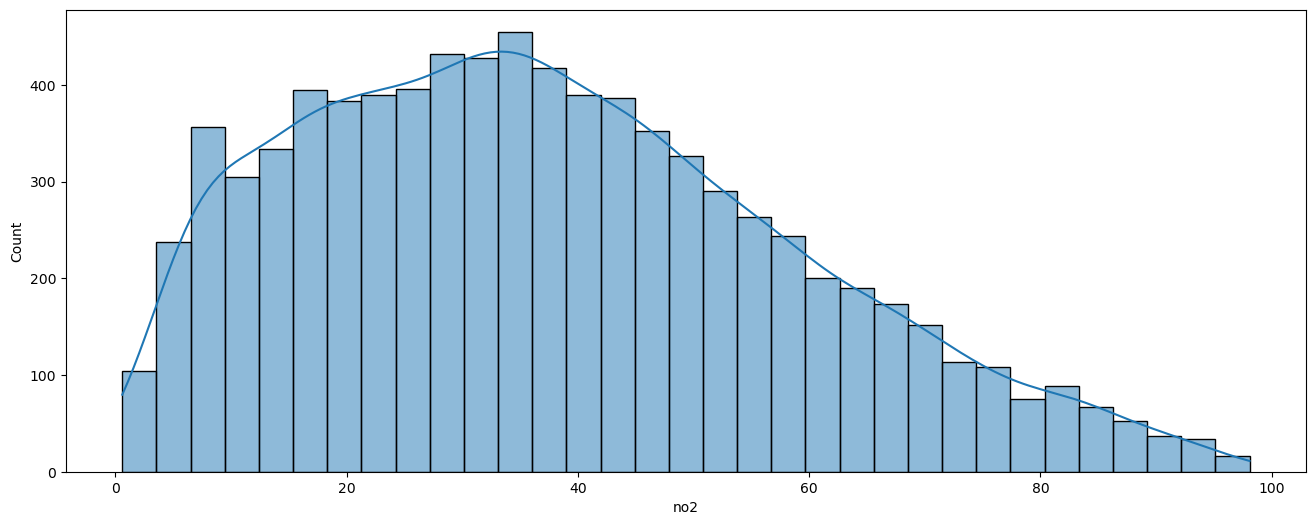

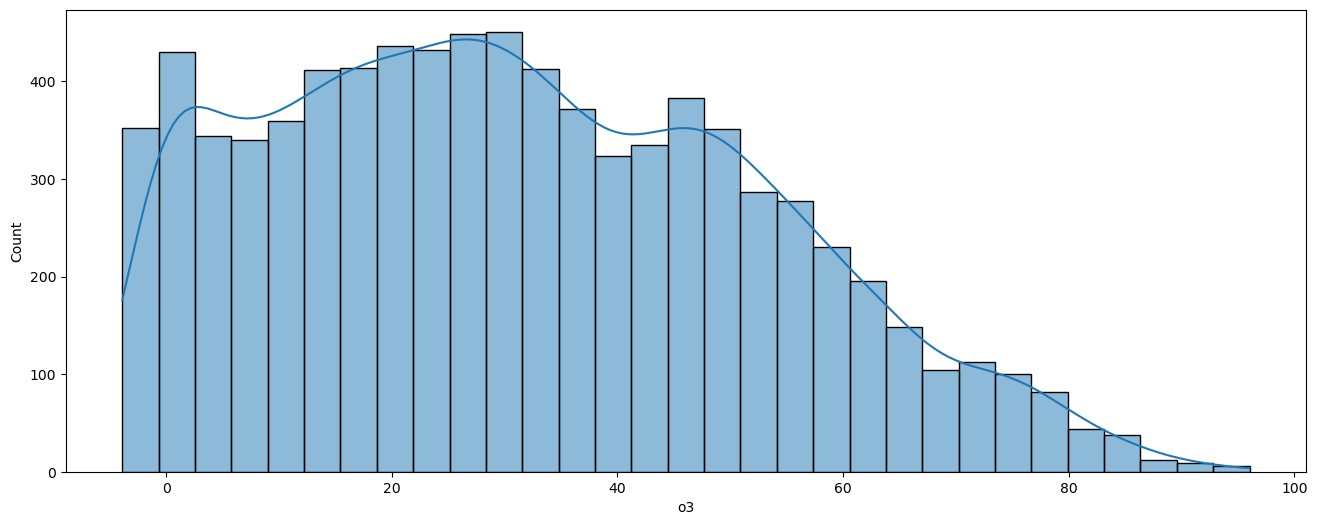

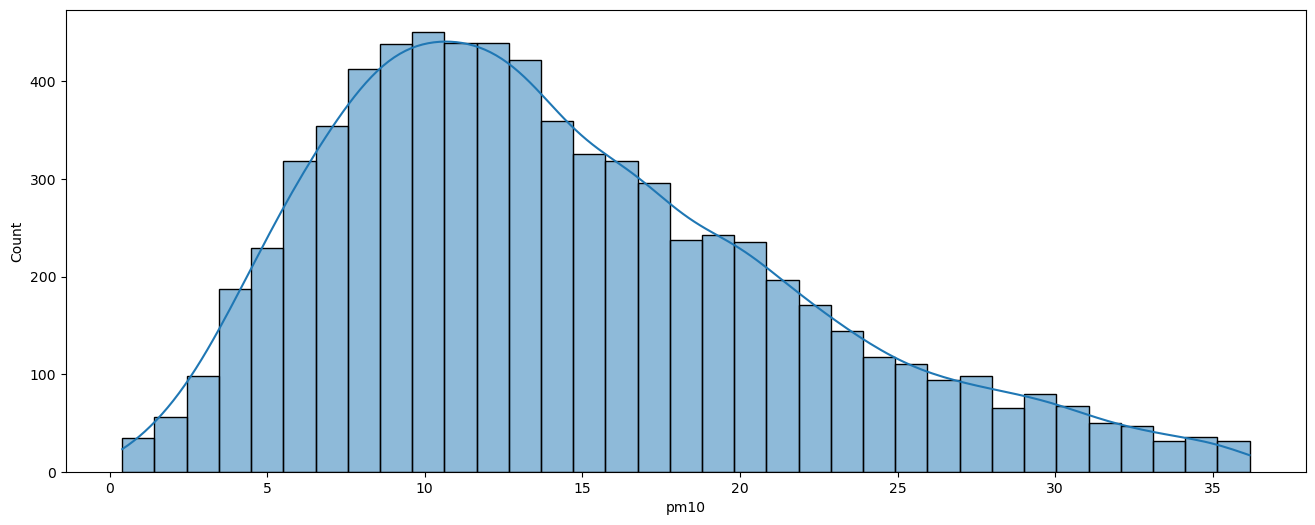

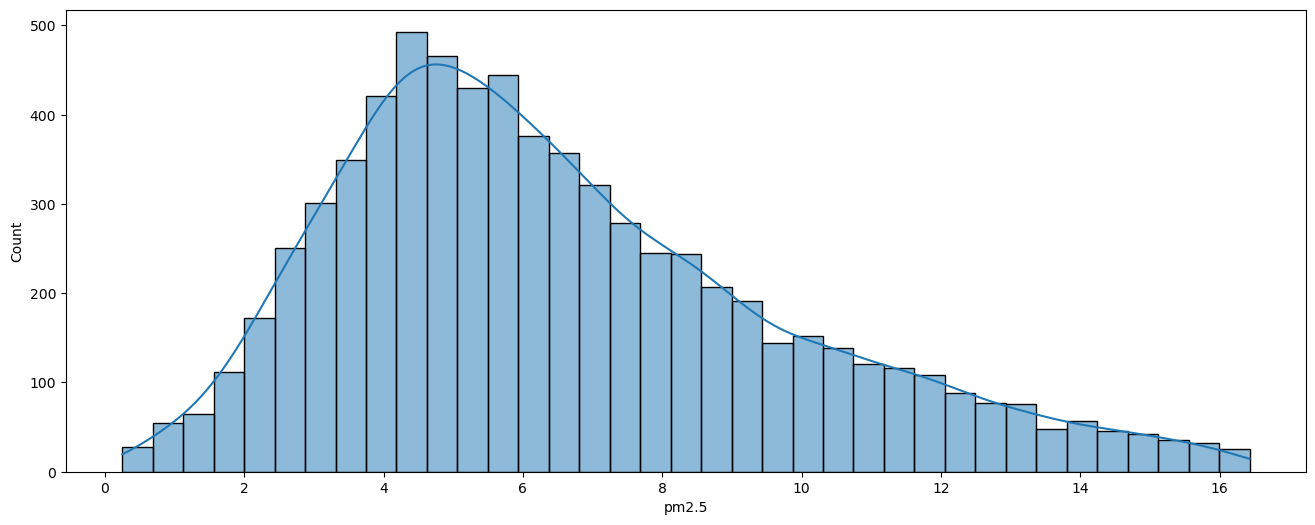

In [15]:
def plothistogram(dataset, col,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    plt.figure(figsize=(16, 6))
    sns.histplot(timeframe[col], kde=True)
    plt.show()
    

plothistogram(aqi_copy, 'no2', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plothistogram(aqi_copy, 'o3', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plothistogram(aqi_copy, 'o3', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plothistogram(aqi_copy, 'pm10', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plothistogram(aqi_copy, 'pm2.5', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')

    

### How many days of data is missing?

In [16]:
df = aqi_copy.set_index('datetime')
len(pd.date_range(start = aqi_2022['datetime'].min(), end = aqi_2022['datetime'].max()).difference(df.index))

22

In [17]:
#aqi_copy = (aqi_copy.set_index('datetime')
#      .reindex(pd.date_range(aqi_2022['datetime'].min(), aqi_2022['datetime'].max(), freq='1h'))
#      .rename_axis(['datetime'])
#      .fillna(np.nan)
#      .reset_index())

### How many missing values?

In [18]:
aqi_copy.isna().sum()

index          0
datetime       0
no2          105
o3            55
pm10        1064
pm2.5       1184
dtype: int64

In [19]:
monthly_mean = aqi_copy.set_index('datetime')
monthly_mean = monthly_mean.resample('M').mean().reset_index()
monthly_mean['month'] = monthly_mean['datetime'].dt.strftime("%m")

In [20]:
def fillMissingValues(row, df, col_name):
    datetime = row['datetime']
    row_val = row[col_name]
    if math.isnan(row_val):
        
        datarrow = df[df['month'] == datetime.strftime("%m")]
        
        [value] = datarrow[col_name].values
        if math.isnan(value):
            row_val = aqi_copy[col_name].mean()
        else:
            row_val = value

    return row_val

aqi_copy['no2'] = aqi_copy.apply(lambda x: fillMissingValues(x, monthly_mean, 'no2'), axis = 1)
aqi_copy['o3'] = aqi_copy.apply(lambda x: fillMissingValues(x, monthly_mean, 'o3'), axis = 1)
aqi_copy['pm10'] = aqi_copy.apply(lambda x: fillMissingValues(x, monthly_mean, 'pm10'), axis = 1)
aqi_copy['pm2.5'] = aqi_copy.apply(lambda x: fillMissingValues(x, monthly_mean, 'pm2.5'), axis = 1)

In [21]:
aqi_copy.isna().sum()

index       0
datetime    0
no2         0
o3          0
pm10        0
pm2.5       0
dtype: int64

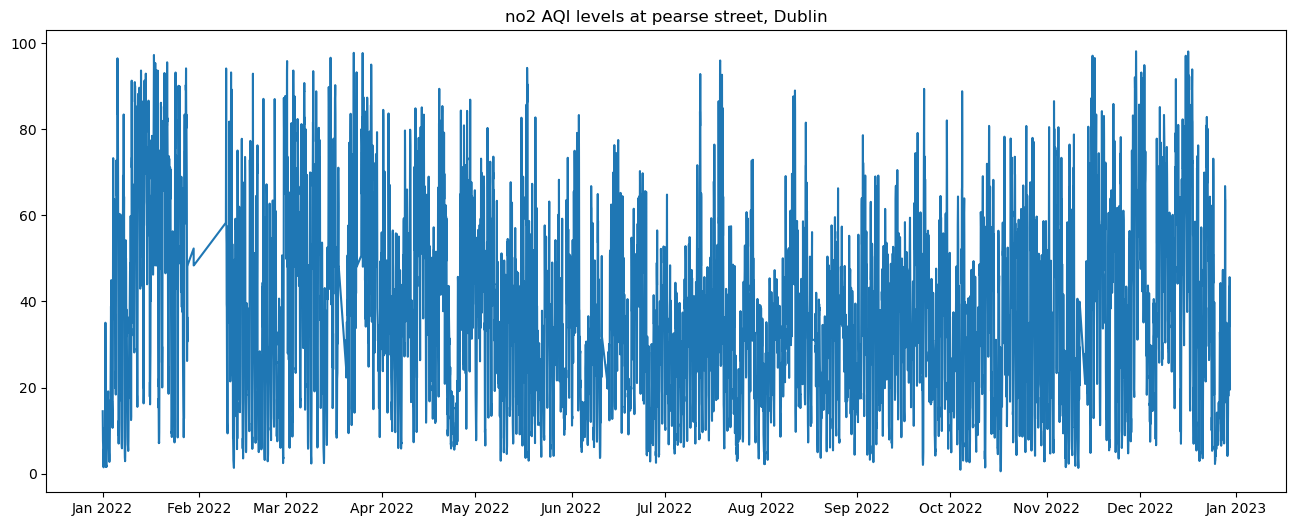

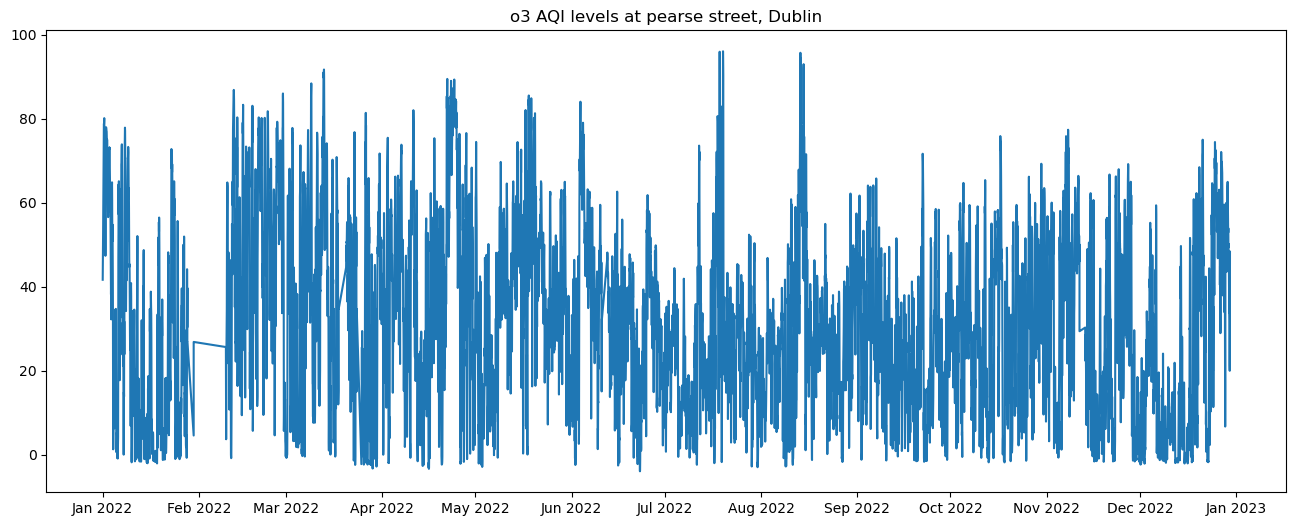

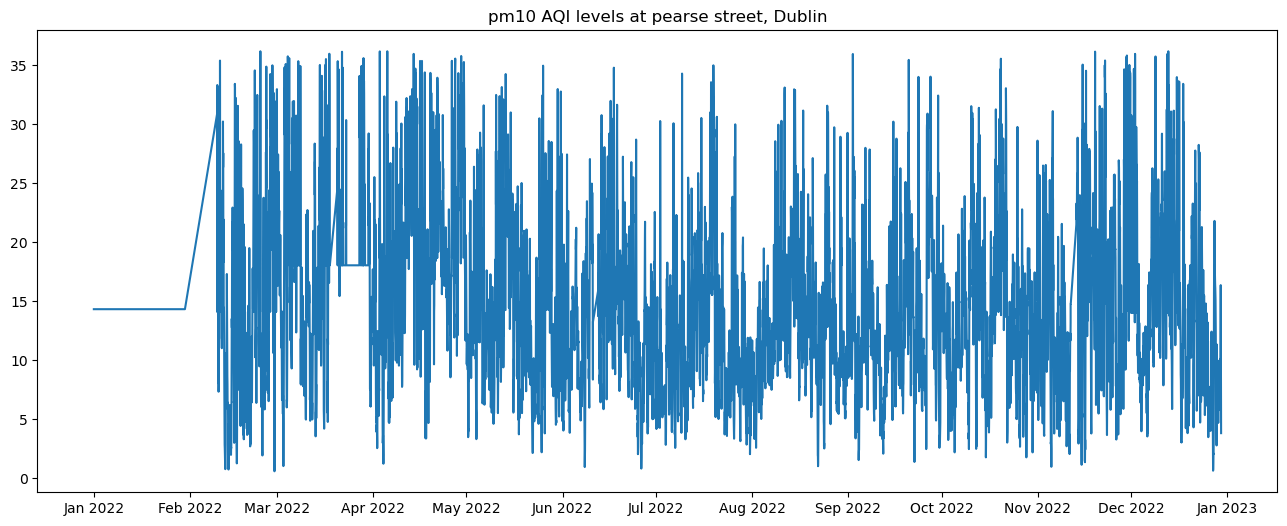

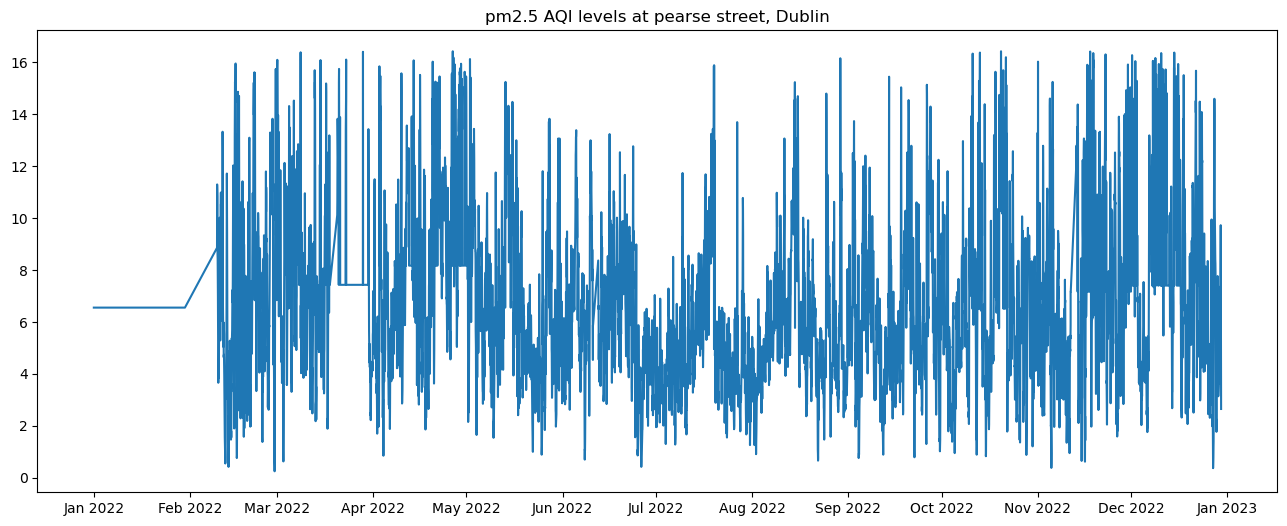

In [22]:
import matplotlib.dates as mdates

def plotline(dataset, col,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]

    plt.figure(figsize=(16, 6))
    sns.lineplot(data=timeframe, x='datetime', y=col)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col +" " +title)

    date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
    desired_tick_frequency = mdates.MonthLocator()
    # Apply the tick frequency and formatter to the x-axis
    plt.gca().xaxis.set_major_locator(desired_tick_frequency)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    
    #plt.legend()
    
    plt.show()
    

plotline(aqi_copy, 'no2', '2022-01-01', '2022-12-30', 'AQI levels at pearse street, Dublin')
plotline(aqi_copy, 'o3', '2022-01-01', '2022-12-30', 'AQI levels at pearse street, Dublin')
plotline(aqi_copy, 'pm10', '2022-01-01', '2022-12-30', 'AQI levels at pearse street, Dublin')
plotline(aqi_copy, 'pm2.5', '2022-01-01', '2022-12-30', 'AQI levels at pearse street, Dublin')

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')


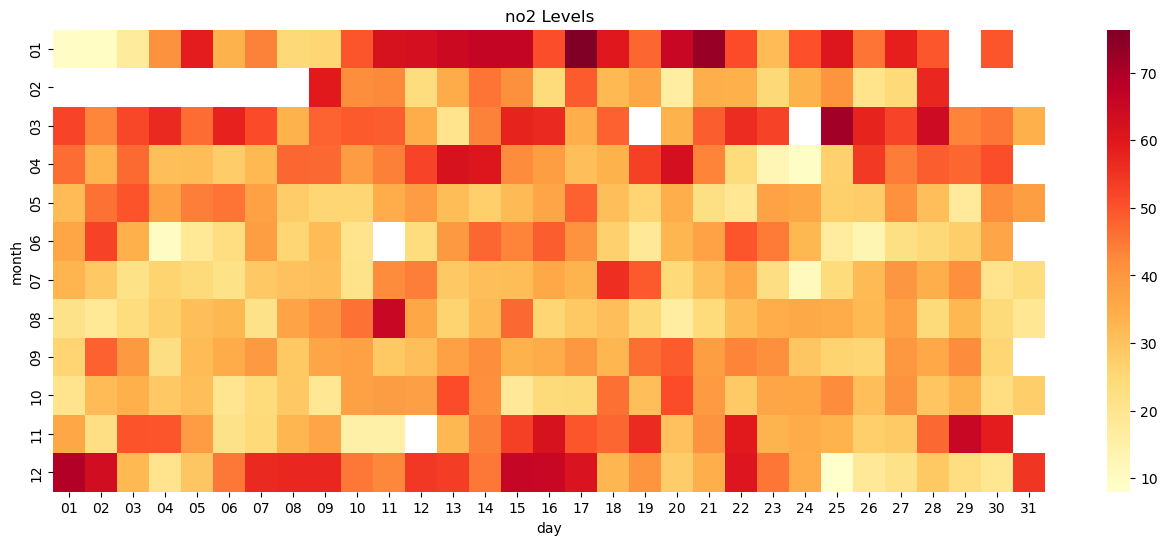

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')


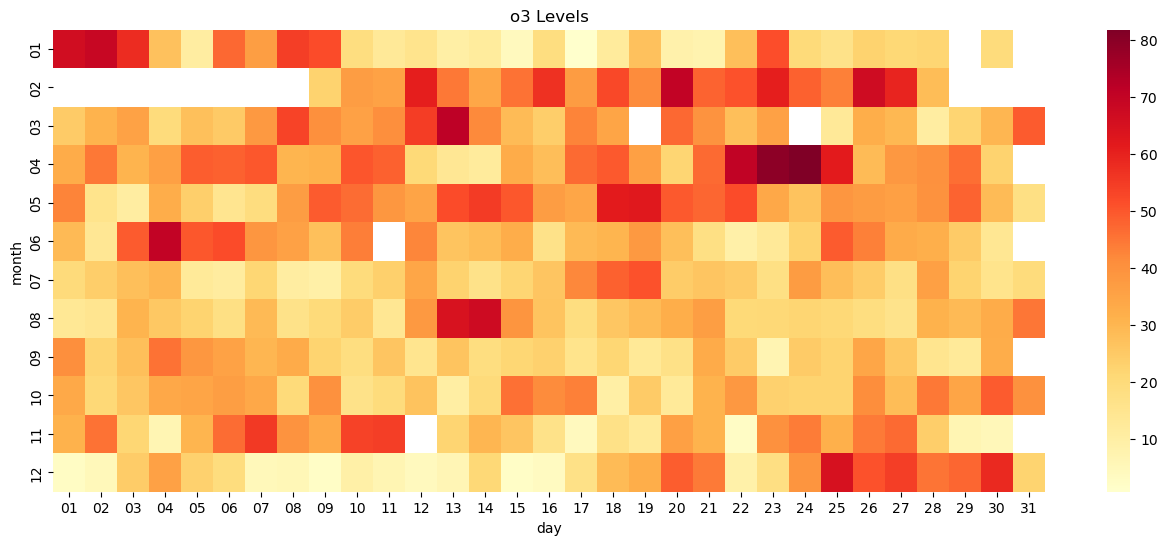

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')


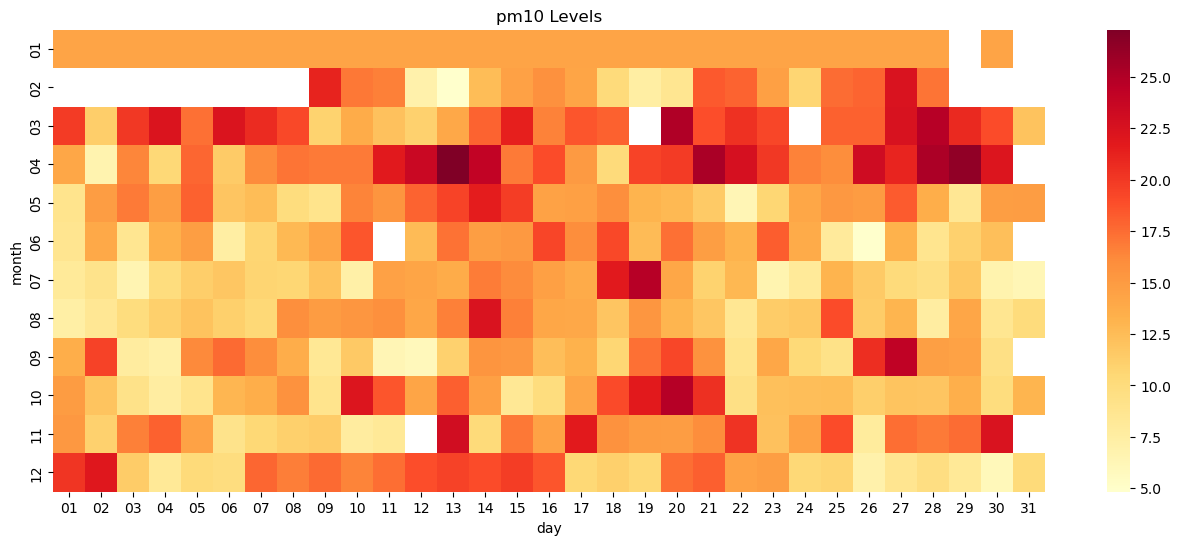

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_2320/1875978788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')


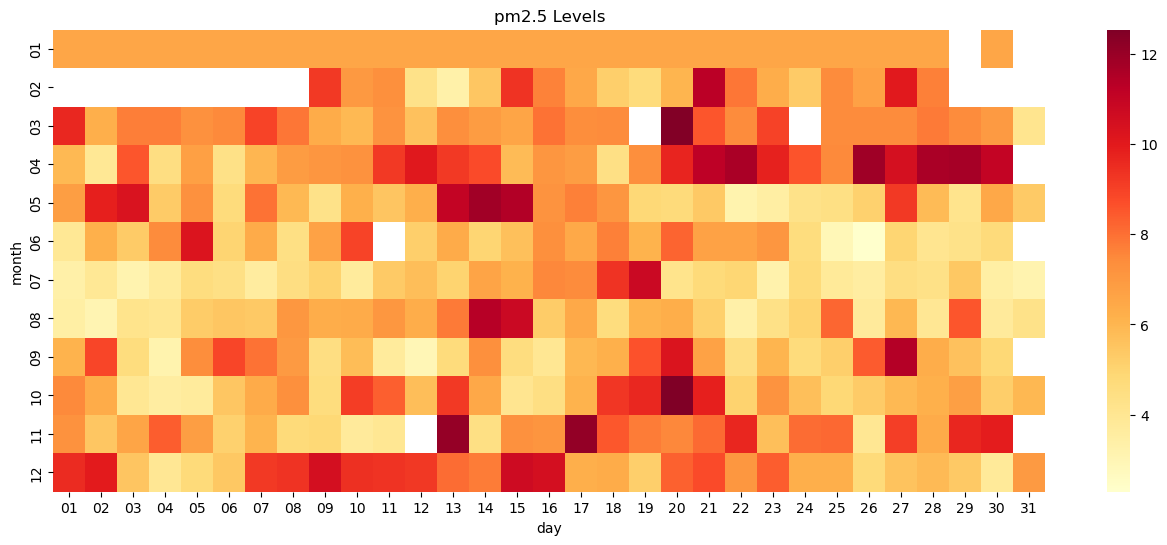

In [25]:

def plotheatmap(dataset, col, fromtime, to, title):
    dataset = dataset.reset_index()
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
    timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')
    
    timeframe_pm10 = timeframe.pivot_table(index = 'month',values=col, columns='day')
    #g = sns.FacetGrid(timeframe, col="month", col_wrap=2)
    
    #g.map_dataframe(lambda data, color: sns.heatmap(data=timeframe, cmap='YlOrRd'))
    plt.figure(figsize=(16, 6))
    sns.heatmap(data=timeframe_pm10, cmap='YlOrRd')
    
    plt.title(col + " Levels")
    plt.show()

plotheatmap(aqi_copy, 'no2', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plotheatmap(aqi_copy, 'o3', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plotheatmap(aqi_copy, 'pm10', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')
plotheatmap(aqi_copy, 'pm2.5', '2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')

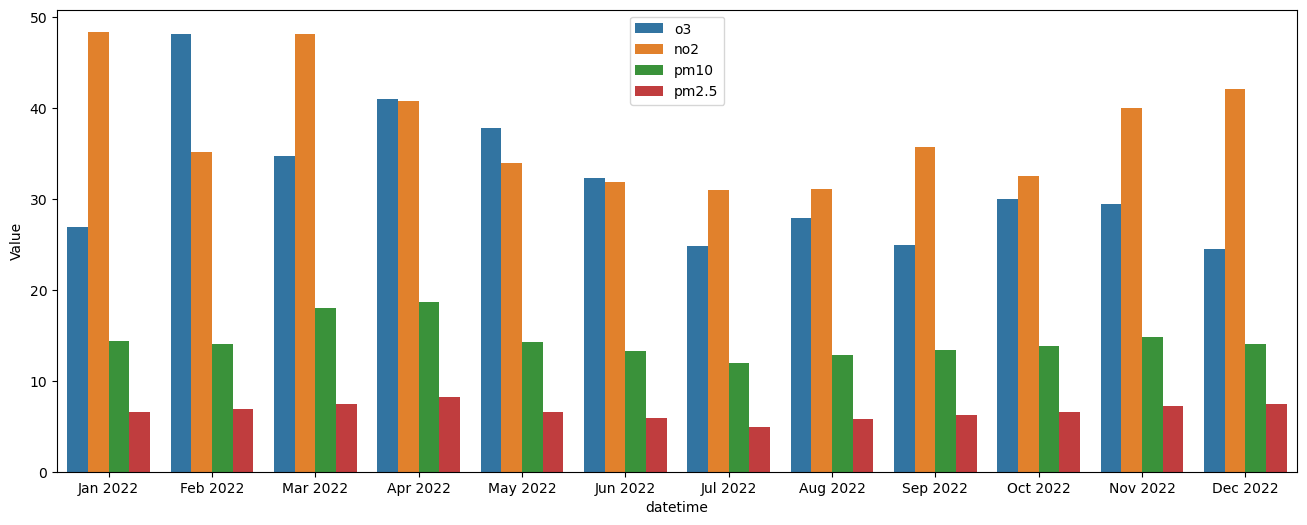

In [26]:
def plotbars(dataset, fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.set_index('datetime', inplace=True)
    
    timeframe = timeframe.resample('M').mean().reset_index()
    
    plt.figure(figsize=(16, 6))
    
    df_melted = pd.melt(timeframe, id_vars='datetime', value_vars=['o3', 'no2','pm10', 'pm2.5'], var_name='Pollutant', value_name='Value')

    # Create the grouped bar plot using seaborn
    sns.barplot(data=df_melted, x='datetime', y='Value', hue='Pollutant')

    plt.gca().xaxis.set_major_formatter(plt.FixedFormatter([date.strftime('%b %Y') for date in timeframe['datetime']]))

    plt.legend()
    
    plt.show()

plotbars(aqi_copy,'2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')    
